### Analítica Computacional para la toma de Decisiones
### Taller 6 - Intro a Redes Neuronales

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

2024-09-16 17:13:25.561952: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Cargar los datos
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                        'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

#### Punto 1

In [5]:
# Seleccionar las columnas continuas
X = df[['Displacement', 'Horsepower', 'Weight', 'Acceleration']].values
y = df['MPG'].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo base
model_base = Sequential()
model_base.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_base.add(Dense(32, activation='relu'))
model_base.add(Dense(1))  # Salida para regresión

# Compilar el modelo
model_base.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Punto 2

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 597.8071 - val_loss: 668.1070
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 565.2220 - val_loss: 653.1658
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 599.2221 - val_loss: 635.8694
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 544.9459 - val_loss: 615.3893
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 536.5967 - val_loss: 589.9016
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 497.9179 - val_loss: 558.9863
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 467.4441 - val_loss: 521.5361
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 437.1310 - val_loss: 476.6932
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 401.1701 - val_loss: 424.2537
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 377.3215 - val_loss: 365.3635
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 287.2794 - val_loss: 303.3100
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0

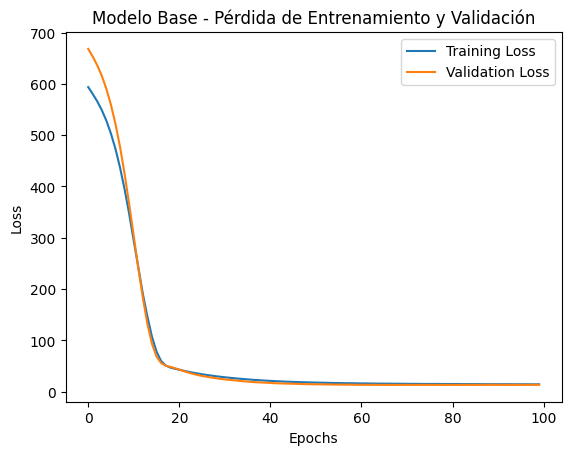

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.3879 
Modelo Base - Test Loss: 15.389045715332031
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


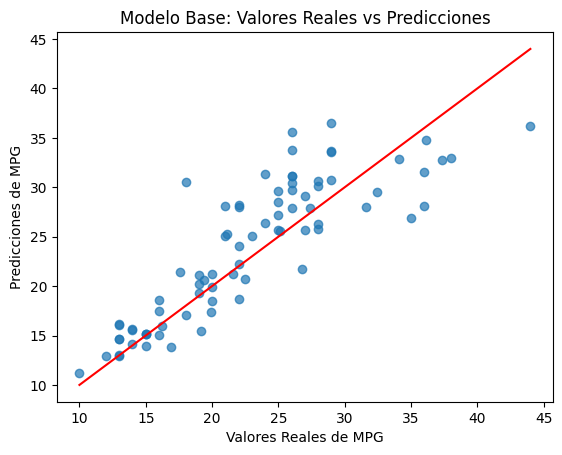

In [6]:
# Entrenar el modelo
history_base = model_base.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Graficar el historial de pérdida
plt.plot(history_base.history['loss'], label='Training Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.title('Modelo Base - Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#  Evaluar el modelo en el conjunto de prueba
test_loss_base = model_base.evaluate(X_test, y_test)
print(f"Modelo Base - Test Loss: {test_loss_base}")

# Hacer predicciones
y_pred_base = model_base.predict(X_test)

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_base, label='Predicciones vs Valores Reales', alpha=0.7)
plt.xlabel('Valores Reales de MPG')
plt.ylabel('Predicciones de MPG')
plt.title('Modelo Base: Valores Reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea perfecta
plt.show()

Crear funciones para gráficos

In [7]:
def plot_historial_perdida (history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [8]:
def plot_predicciones (y_pred_1, label_1, y_pred_2, label_2, y_pred_3, label_3):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_1, label=label_1, alpha=0.5)
    plt.scatter(y_test, y_pred_2, label=label_2, alpha=0.5)
    plt.scatter(y_test, y_pred_3, label=label_3, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.xlabel('Valores Reales de MPG')
    plt.ylabel('Predicciones de MPG')
    plt.title('Comparación de Modelos: Predicciones vs Valores Reales')
    plt.legend()
    plt.show()

#### Punto 3: Modificar el número de neuronas

In [9]:
def create_model(neurons):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# 32 neuronas
model_32 = create_model(32)
history_32 = model_32.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 128 neuronas
model_128 = create_model(128)
history_128 = model_128.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 256 neuronas
model_256 = create_model(256)
history_256 = model_256.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 609.2128 - val_loss: 687.7177
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 592.7850 - val_loss: 675.5263
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 569.6720 - val_loss: 664.0381
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 614.6533 - val_loss: 652.1415
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 589.0013 - val_loss: 639.0870
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 553.6825 - val_loss: 624.3682
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 570.9760 - val_loss: 607.4542
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 507.7308 - val_loss: 587.6846
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 483.8763 - val_loss: 563.6745
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 512.5174 - val_loss: 535.3570
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 442.9109 - val_loss: 503.8066
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0

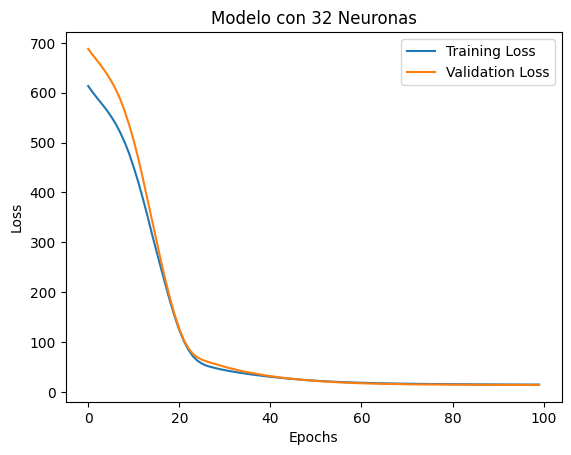

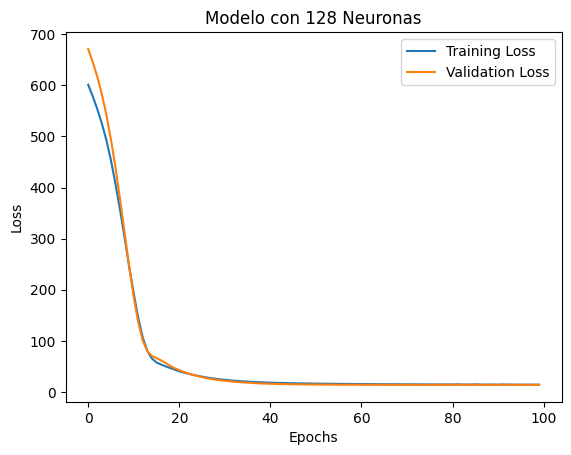

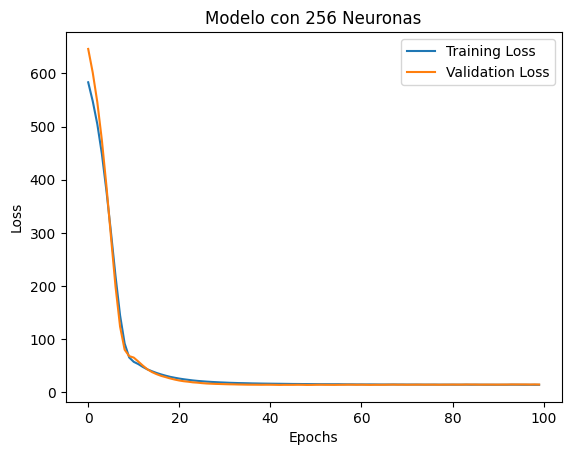

In [10]:
# Graficar historial de pérdida cada modelo
plot_historial_perdida(history_32, 'Modelo con 32 Neuronas')
plot_historial_perdida(history_128, 'Modelo con 128 Neuronas')
plot_historial_perdida(history_256, 'Modelo con 256 Neuronas')

In [11]:
# Evaluar cada modelo en el conjunto de prueba
test_loss_32 = model_32.evaluate(X_test, y_test)
test_loss_128 = model_128.evaluate(X_test, y_test)
test_loss_256 = model_256.evaluate(X_test, y_test)

print(f"Modelo con 32 Neuronas - Test Loss: {test_loss_32}")
print(f"Modelo con 128 Neuronas - Test Loss: {test_loss_128}")
print(f"Modelo con 256 Neuronas - Test Loss: {test_loss_256}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.8453 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.5582 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.4601 
Modelo con 32 Neuronas - Test Loss: 15.905219078063965
Modelo con 128 Neuronas - Test Loss: 15.498664855957031
Modelo con 256 Neuronas - Test Loss: 16.099328994750977


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x13843fe20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


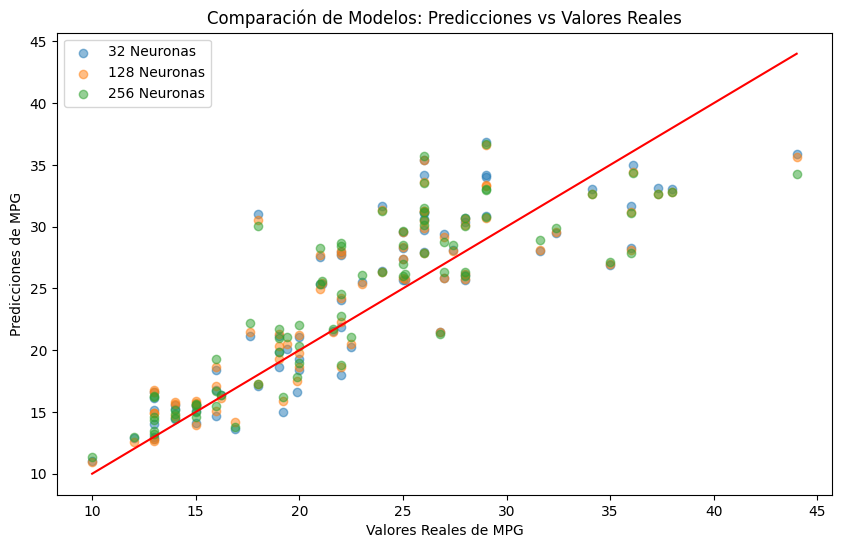

In [12]:
# Hacer predicciones de cada modelo
y_pred_32 = model_32.predict(X_test)
y_pred_128 = model_128.predict(X_test)
y_pred_256 = model_256.predict(X_test)

# Graficar las predicciones en un solo grafico
plot_predicciones(y_pred_32, '32 Neuronas', y_pred_128, '128 Neuronas', y_pred_256, '256 Neuronas')

#### Punto 4: Modificar el número de capas

In [13]:
def create_model_layers(layers):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(layers):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# 2 capas
model_2_layers = create_model_layers(2)
history_2_layers = model_2_layers.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 3 capas
model_3_layers = create_model_layers(3)
history_3_layers = model_3_layers.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 4 capas
model_4_layers = create_model_layers(4)
history_4_layers = model_4_layers.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 616.8259 - val_loss: 672.5861
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 624.5807 - val_loss: 650.1564
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 545.8267 - val_loss: 616.2495
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 542.8390 - val_loss: 561.5349
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 486.4142 - val_loss: 474.3885
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 377.2361 - val_loss: 351.8654
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 285.5870 - val_loss: 209.8345
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 166.9015 - val_loss: 95.4175
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 86.7349 - val_loss: 55.9290
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 52.9184 - val_loss: 64.2137
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 60.4686 - val_loss: 49.8650
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0

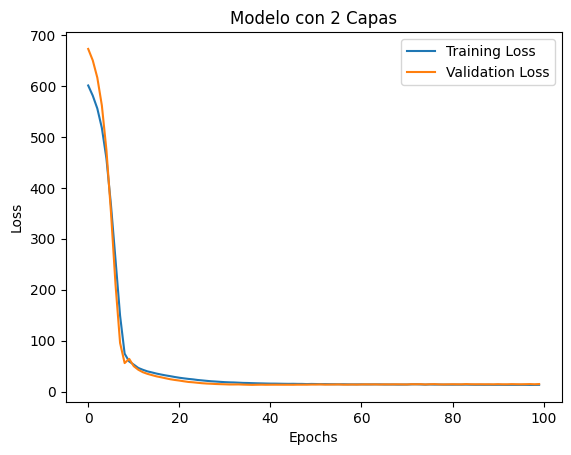

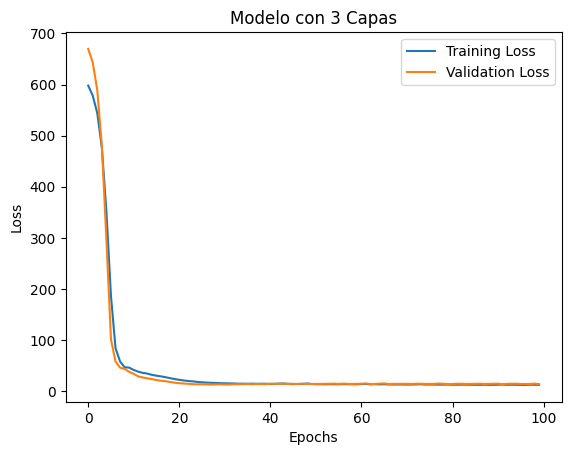

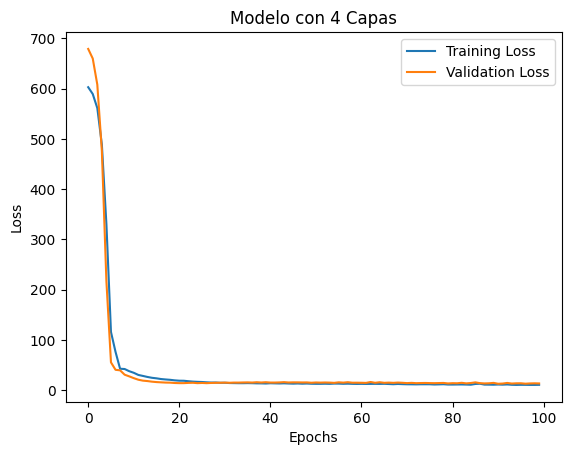

In [14]:
# Graficar historial de pérdida cada modelo
plot_historial_perdida(history_2_layers, 'Modelo con 2 Capas')
plot_historial_perdida(history_3_layers, 'Modelo con 3 Capas')
plot_historial_perdida(history_4_layers, 'Modelo con 4 Capas')

In [15]:
# Evaluar cada modelo en el conjunto de prueba
test_loss_2 = model_2_layers.evaluate(X_test, y_test)
test_loss_3 = model_3_layers.evaluate(X_test, y_test)
test_loss_4 = model_4_layers.evaluate(X_test, y_test)

print(f"Modelo con 2 Capas - Test Loss: {test_loss_2}")
print(f"Modelo con 3 Capas - Test Loss: {test_loss_3}")
print(f"Modelo con 4 Capas - Test Loss: {test_loss_4}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.1292 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.2386 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9107 
Modelo con 2 Capas - Test Loss: 16.496959686279297
Modelo con 3 Capas - Test Loss: 18.118749618530273
Modelo con 4 Capas - Test Loss: 16.408010482788086


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


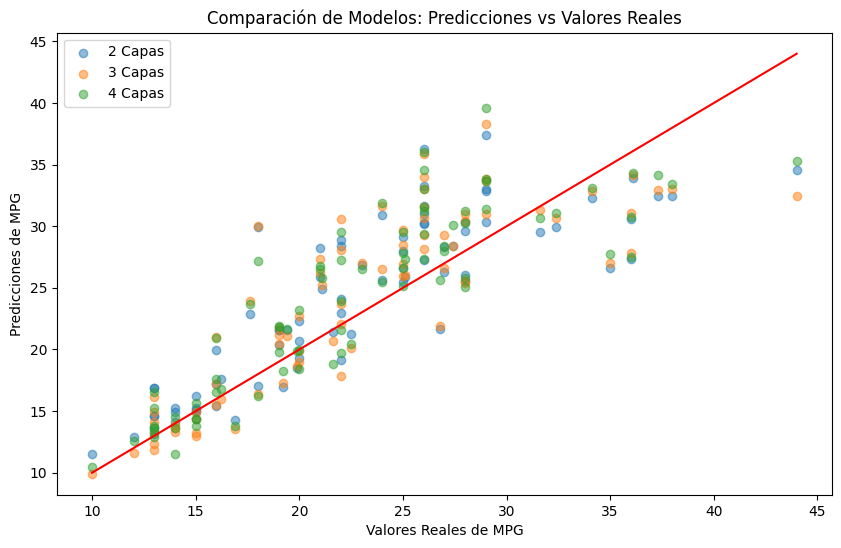

In [16]:
# Hacer predicciones de cada modelo
y_pred_2 = model_2_layers.predict(X_test)
y_pred_3 = model_3_layers.predict(X_test)
y_pred_4 = model_4_layers.predict(X_test)

# Graficar las predicciones en un solo grafico
plot_predicciones(y_pred_2, '2 Capas', y_pred_3, '3 Capas', y_pred_4, '4 Capas')

#### Punto 5: Modificar las funciones de activación

In [17]:
def create_model_activation(activation):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# tanh
model_tanh = create_model_activation('tanh')
history_tanh = model_tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# sigmoid
model_sigmoid = create_model_activation('sigmoid')
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# elu
model_elu = create_model_activation('elu')
history_elu = model_elu.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 602.9124 - val_loss: 647.4921
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 571.4868 - val_loss: 622.5850
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 568.9404 - val_loss: 597.6866
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 542.9678 - val_loss: 574.0798
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 532.9415 - val_loss: 551.6668
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 509.7773 - val_loss: 532.2776
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 480.5715 - val_loss: 513.4283
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 497.8354 - val_loss: 496.6971
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 466.2094 - val_loss: 479.9163
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 451.0238 - val_loss: 462.9688
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 438.6686 - val_loss: 444.1509
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s

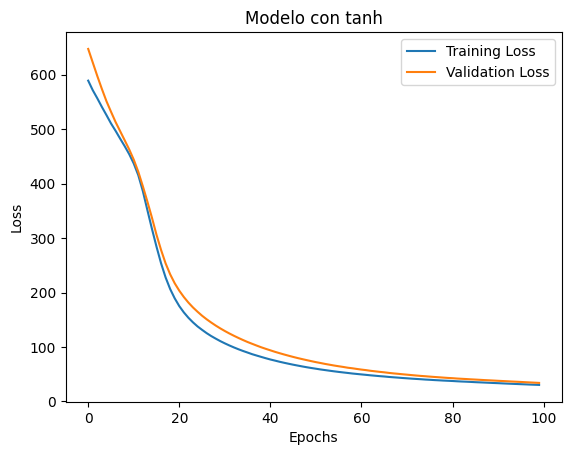

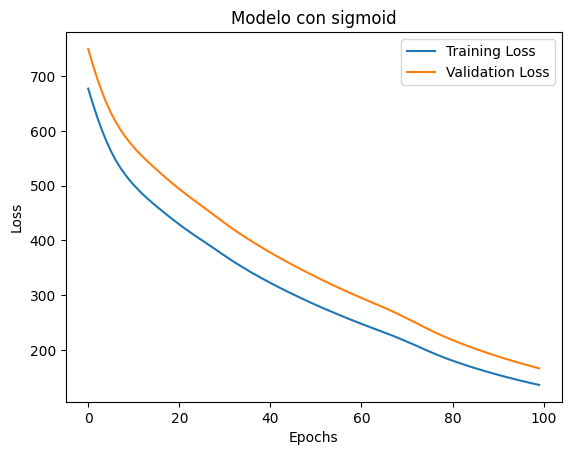

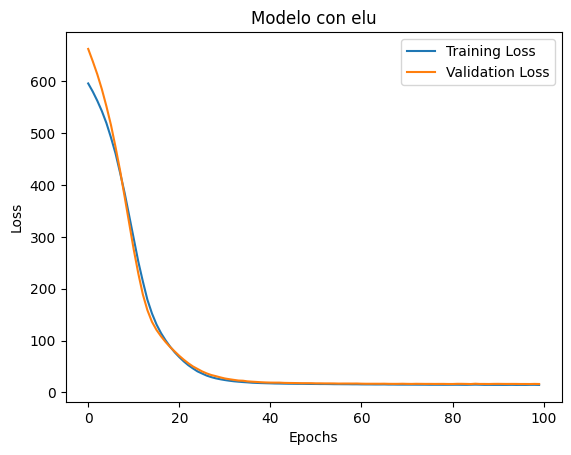

In [18]:
# Graficar historial de pérdida cada modelo
plot_historial_perdida(history_tanh, 'Modelo con tanh')
plot_historial_perdida(history_sigmoid, 'Modelo con sigmoid')
plot_historial_perdida(history_elu, 'Modelo con elu')

In [19]:
# Evaluar cada modelo en el conjunto de prueba
test_loss_tanh = model_tanh.evaluate(X_test, y_test)
test_loss_sigmoid = model_sigmoid.evaluate(X_test, y_test)
test_loss_elu = model_elu.evaluate(X_test, y_test)

print(f"Modelo con tanh - Test Loss: {test_loss_tanh}")
print(f"Modelo con sigmoid - Test Loss: {test_loss_sigmoid}")
print(f"Modelo con elu - Test Loss: {test_loss_elu}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.7091 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 125.6568
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.5635 
Modelo con tanh - Test Loss: 22.19364356994629
Modelo con sigmoid - Test Loss: 116.19903564453125
Modelo con elu - Test Loss: 16.068634033203125


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


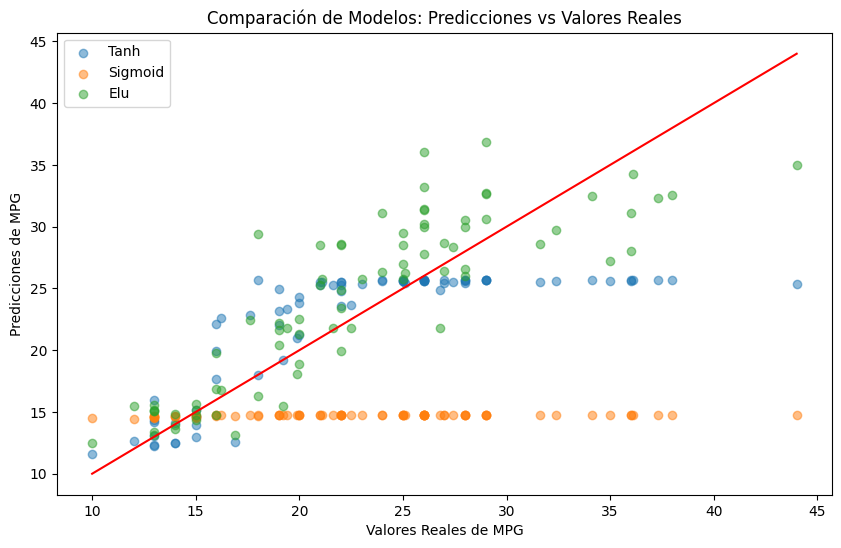

In [20]:
# Hacer predicciones de cada modelo
y_pred_tanh = model_tanh.predict(X_test)
y_pred_sigmoid = model_sigmoid.predict(X_test)
y_pred_elu = model_elu.predict(X_test)

# Graficar las predicciones en un solo grafico
plot_predicciones(y_pred_tanh, 'Tanh', y_pred_sigmoid, 'Sigmoid', y_pred_elu, 'Elu')

#### Punto 6: Proponer dos modelos

#### Modelo 1: 4 capas, 256 neuronas, función de activación elu

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 579.6276 - val_loss: 381.9350
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 325.0152 - val_loss: 142.8519
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 106.4441 - val_loss: 117.6300
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 75.5034 - val_loss: 45.3929
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 33.9223 - val_loss: 29.0321
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.2928 - val_loss: 24.2670
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 29.1920 - val_loss: 20.9409
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.9694 - val_loss: 19.6578
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.2581 - val_loss: 17.4619
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.1840 - val_loss: 18.9527
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.2202 - val_loss: 17.7658
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/

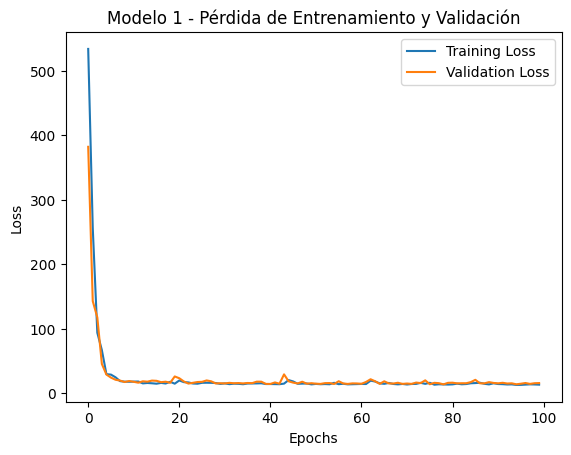

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.7256 
Modelo 1 - Test Loss: 14.64424991607666
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


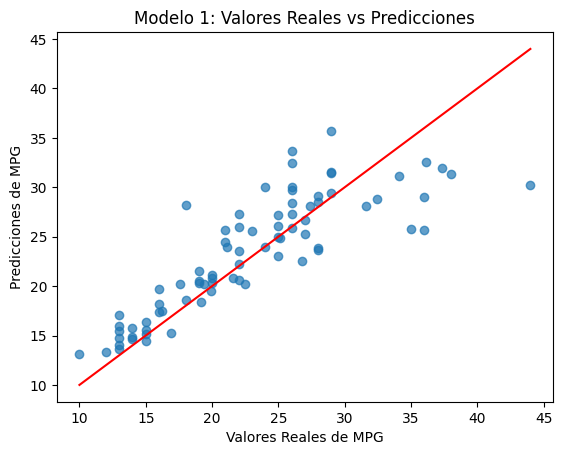

In [21]:
model_1 = Sequential()
model_1.add(Dense(256, input_dim=X_train.shape[1], activation='elu'))
model_1.add(Dense(256, activation='elu'))
model_1.add(Dense(256, activation='elu'))
model_1.add(Dense(256, activation='elu'))
model_1.add(Dense(1))  

# Compilar el modelo
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
history_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Graficar el historial de pérdida del modelo 1
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Modelo 1 - Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo 1 en el conjunto de prueba
test_loss_1 = model_1.evaluate(X_test, y_test)
print(f"Modelo 1 - Test Loss: {test_loss_1}")

# Hacer predicciones
y_pred_1 = model_1.predict(X_test)

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_1, label='Predicciones vs Valores Reales', alpha=0.7)
plt.xlabel('Valores Reales de MPG')
plt.ylabel('Predicciones de MPG')
plt.title('Modelo 1: Valores Reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.show()


####  Modelo 2: 3 capas, 128 neuronas, función de activación tanh

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 576.6523 - val_loss: 595.4614
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 517.8115 - val_loss: 512.4091
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 487.5715 - val_loss: 451.1811
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 445.5688 - val_loss: 412.3048
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 418.0075 - val_loss: 368.3940
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 343.1385 - val_loss: 288.5627
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 252.0773 - val_loss: 194.3553
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 133.4523 - val_loss: 93.2065
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 70.2268 - val_loss: 68.5787
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 57.1287 - val_loss: 58.1850
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 45.7185 - val_loss: 50.3318
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 

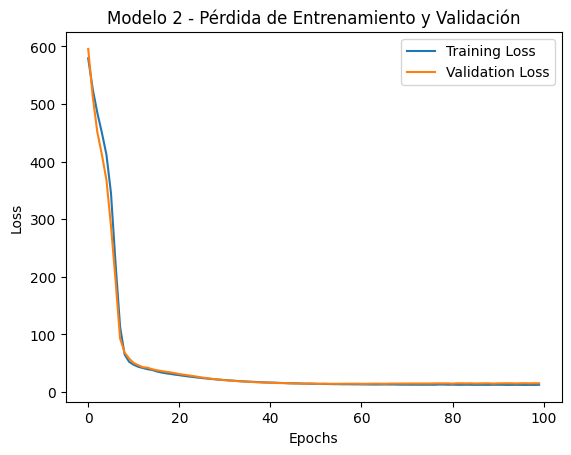

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.1785 
Modelo 2 - Test Loss: 15.984920501708984
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


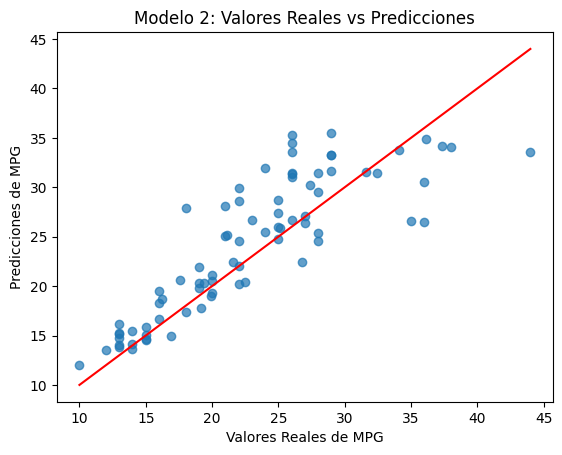

In [22]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=X_train.shape[1], activation='tanh'))
model_2.add(Dense(128, activation='tanh'))
model_2.add(Dense(128, activation='tanh'))
model_2.add(Dense(1))  # Salida para regresión

# Compilar el modelo
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Graficar el historial de pérdida del modelo 2
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Modelo 2 - Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo 2 en el conjunto de prueba
test_loss_2 = model_2.evaluate(X_test, y_test)
print(f"Modelo 2 - Test Loss: {test_loss_2}")

# Hacer predicciones
y_pred_2 = model_2.predict(X_test)

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_2, label='Predicciones vs Valores Reales', alpha=0.7)
plt.xlabel('Valores Reales de MPG')
plt.ylabel('Predicciones de MPG')
plt.title('Modelo 2: Valores Reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.show()
